# <span style='background-color:yellow;'> Problem 1. </span>

## For single plot
### ex) input : 16

In [2]:
subject_num = int(input('\n\n Subject Number: '))



 Subject Number: 16


In [3]:
def P1(subject_num):
    
    if subject_num < 10:
        df = pd.read_csv('./ChallengingProject//TML0{}_Dis.txt'.format(subject_num), sep='\t', header=None)
    else :
        df = pd.read_csv('./ChallengingProject//TML{}_Dis.txt'.format(subject_num), sep='\t', header=None)
    df.columns = ['Block','Trial','f1','First Time','f2','Second Time','Decision','Time to Decide','Third Time']
    
    
    high_prob = []

    
    for F in range(10, 21):
        
        if (F == 15):
            continue
    
        else:
            high_score = 0
            Dec_list = list(df[df['f1']==F]['Decision'])
            high_score += Dec_list.count('before')
            Dec_list = list(df[df['f2']==F]['Decision'])
            high_score += Dec_list.count('after')
    
            high_prob.append(high_score/10)
    
    
    x = [i for i in range(10,21) if i!=15 ]
    y = high_prob
    
    
    plt.scatter(x, y)
    plt.grid(True)
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('proportion \'higher\' responses')
    
    
    if subject_num < 10:
        plt.title('TML0{}'.format(subject_num))
    else:
        plt.title('TML{}'.format(subject_num))

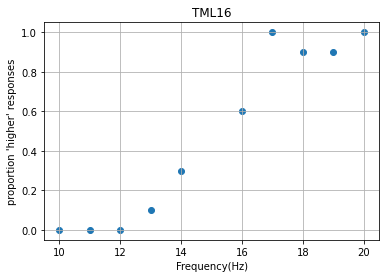

In [4]:
P1(subject_num)

## For multiple plots
### ex) input : 4,7,10,13,16,21,23

In [5]:
filenames = os.listdir('./ChallengingProject')
print(filenames)

subject_num = input('\n\n Subject Numbers (no spacing): ')

['TML04_Dis.txt', 'TML05_Dis.txt', 'TML06_Dis.txt', 'TML07_Dis.txt', 'TML09_Dis.txt', 'TML10_Dis.txt', 'TML11_Dis.txt', 'TML12_Dis.txt', 'TML13_Dis.txt', 'TML14_Dis.txt', 'TML15_Dis.txt', 'TML16_Dis.txt', 'TML18_Dis.txt', 'TML19_Dis.txt', 'TML20_Dis.txt', 'TML21_Dis.txt', 'TML22_Dis.txt', 'TML23_Dis.txt', 'TML24_Dis.txt', 'TML25_Dis.txt', 'TML26_Dis.txt', 'TML27_Dis.txt', 'TML28_Dis.txt', 'TML29_Dis.txt']


 Subject Numbers (no spacing): 4,7,10,13,16,21,23


In [6]:
def  P1_multi(subject_num):
    
    subject_list = subject_num.split(',')
    cnt = 0
    
    
    fig, ax = plt.subplots(len(subject_list), 1, figsize=(8,7*len(subject_list)))
    
    
    for i in subject_list:
        
        if int(i) < 10:
            df = pd.read_csv('./ChallengingProject//TML0{}_Dis.txt'.format(i), sep='\t', header=None)
        else :
            df = pd.read_csv('./ChallengingProject//TML{}_Dis.txt'.format(i), sep='\t', header=None)
        df.columns = ['Block','Trial','f1','First Time','f2','Second Time','Decision','Time to Decide','Third Time']
       
    
        high_prob = []

        for F in range(10, 21):
        
            if (F == 15):
                continue
    
            else:
                high_score = 0
                Dec_list = list(df[df['f1']==F]['Decision'])
                high_score += Dec_list.count('before')
                Dec_list = list(df[df['f2']==F]['Decision'])
                high_score += Dec_list.count('after')
    
                high_prob.append(high_score/10)
        
        
        x = [j for j in range(10,21) if j!=15 ]
        y = high_prob        
        
        
        ax[cnt].scatter(x, y)
        ax[cnt].grid(True)
        ax[cnt].set_xlabel('Frequency(Hz)')
        ax[cnt].set_ylabel('proportion \'higher\' responses')
        
        
        if int(i) < 10:
            ax[cnt].set_title('TML0{}'.format(i))
        else:
            ax[cnt].set_title('TML{}'.format(i))
            
            
        cnt += 1

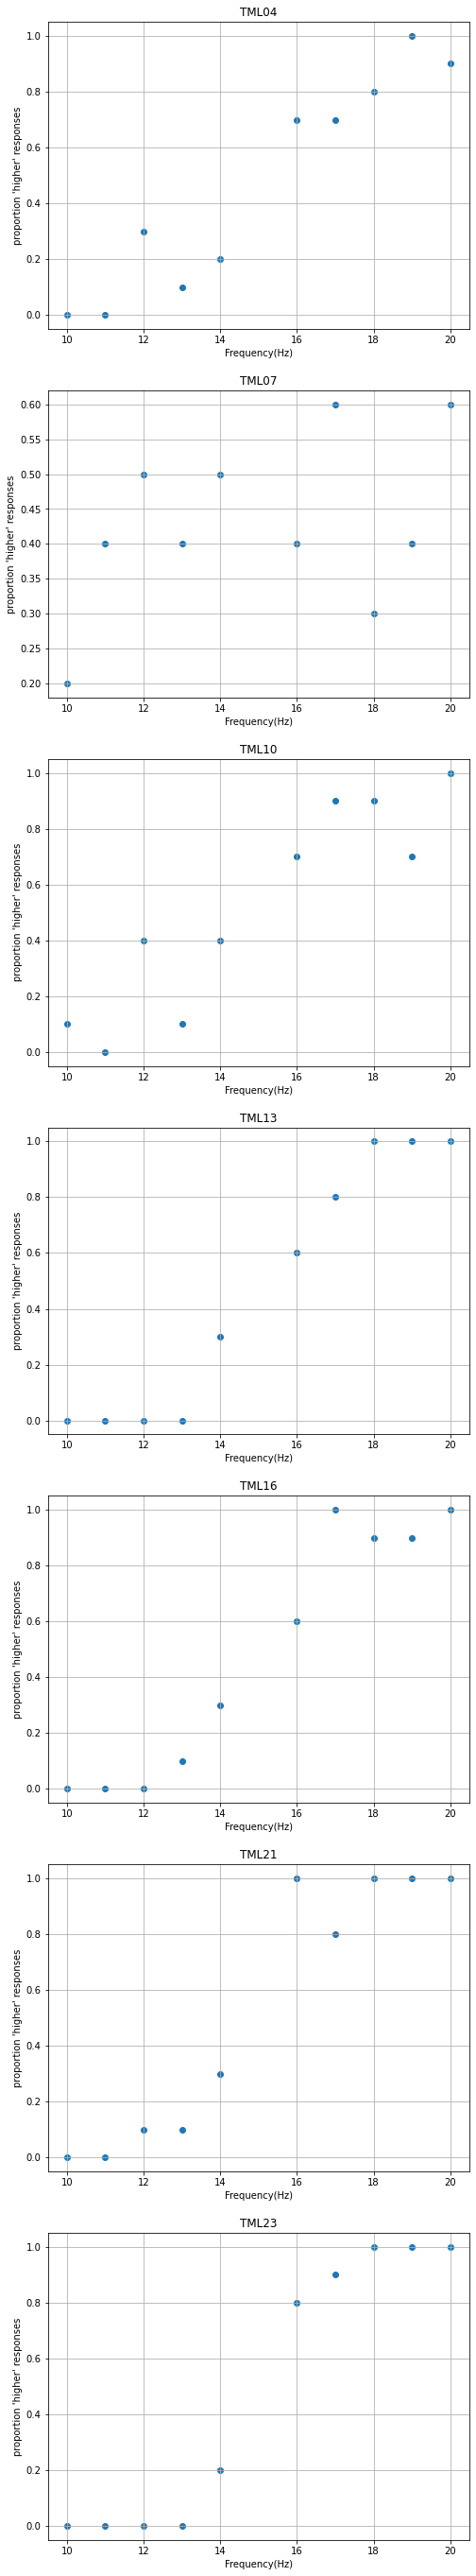

In [7]:
P1_multi(subject_num)

# <span style='background-color:yellow;'>Problem 2. </span>

## For single plot
### ex) input : 16

In [8]:
subject_num = int(input('\n\n Subject Number: '))



 Subject Number: 16


In [9]:
def contour_plot(subject_num):
    
    
    def f(x,a,b,g = 0.5):
        
        if(x < 0):
            return g*(np.exp(-a*(-x)**b))
        elif (x == 0):
            return g
        else:
            return 1-(1-g)*(np.exp(-a*(x**b)))

        
    def RSS(a,b,g = 0.5):
        Sum = 0
        
        for i in range(len(x_diff)):
            each = (f(x_diff[i], a,b)-y[i])**2
            Sum += each
        return Sum

    
    if subject_num < 10:
        df = pd.read_csv('./ChallengingProject//TML0{}_Dis.txt'.format(subject_num), sep='\t', header=None)
    else :
        df = pd.read_csv('./ChallengingProject//TML{}_Dis.txt'.format(subject_num), sep='\t', header=None)
    df.columns = ['Block','Trial','f1','First Time','f2','Second Time','Decision','Time to Decide','Third Time']

    
    high_prob = []

    for F in range(10, 21):
        
        if (F == 15):
            continue
    
        else:
            high_score = 0
            Dec_list = list(df[df['f1']==F]['Decision'])
            high_score += Dec_list.count('before')
            Dec_list = list(df[df['f2']==F]['Decision'])
            high_score += Dec_list.count('after')
    
            high_prob.append(high_score/10)
    
    
    x = [i for i in range(10,21) if i!=15 ]
    y = high_prob
    x_diff = np.array(x)-15
    
    
    alpha = np.arange(0,1,0.001)
    beta = np.arange(0,8,0.001)
    Alpha,Beta = np.meshgrid(alpha,beta)
    Z = np.log(RSS(Alpha,Beta))
    
    optimal_alpha = Alpha.reshape(Alpha.size,)[np.argmin(Z)]
    optimal_beta = Beta.reshape(Beta.size,)[np.argmin(Z)]
    
    
    t = (np.max(Z) - np.min(Z))
    CS = plt.contour(Beta,Alpha,Z,levels=np.linspace(np.min(Z) + (t/10), np.max(Z) + (t/7.8), 8))
    plt.scatter(optimal_beta, optimal_alpha)
    plt.colorbar()
    plt.xlabel('β', fontsize = 15)
    plt.ylabel('α', fontsize = 15)


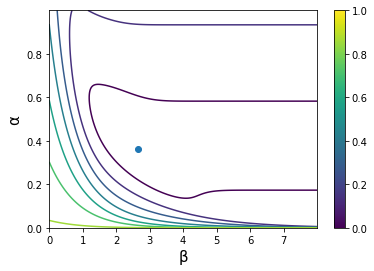

In [10]:
contour_plot(subject_num)

## For multiple plots
### ex) input : 9,13,16,19,22

In [11]:
filenames = os.listdir('./ChallengingProject')
print(filenames)

subject_num = input('\n\n Subject Numbers (no spacing): ')

['TML04_Dis.txt', 'TML05_Dis.txt', 'TML06_Dis.txt', 'TML07_Dis.txt', 'TML09_Dis.txt', 'TML10_Dis.txt', 'TML11_Dis.txt', 'TML12_Dis.txt', 'TML13_Dis.txt', 'TML14_Dis.txt', 'TML15_Dis.txt', 'TML16_Dis.txt', 'TML18_Dis.txt', 'TML19_Dis.txt', 'TML20_Dis.txt', 'TML21_Dis.txt', 'TML22_Dis.txt', 'TML23_Dis.txt', 'TML24_Dis.txt', 'TML25_Dis.txt', 'TML26_Dis.txt', 'TML27_Dis.txt', 'TML28_Dis.txt', 'TML29_Dis.txt']


 Subject Numbers (no spacing): 9,13,16,19,22


In [12]:
def contour_plot(subject_num):

    
    def f(x,a,b,g = 0.5):
        
        if(x < 0):
            return g*(np.exp(-a*(-x)**b))
        elif (x == 0):
            return g
        else:
            return 1-(1-g)*(np.exp(-a*(x**b)))

        
    def RSS(a,b,g = 0.5):
        Sum = 0
        
        for i in range(len(x_diff)):
            each = (f(x_diff[i], a,b)-y[i])**2
            Sum += each
        return Sum
    
    
    subject_list = subject_num.split(',')
   
    cnt = 0
    fig, ax = plt.subplots(len(subject_list), 1, figsize=(8,7*len(subject_list)))
    
    
    for i in subject_list:
        
        if int(i) < 10:
            df = pd.read_csv('./ChallengingProject//TML0{}_Dis.txt'.format(i), sep='\t', header=None)
        else :
            df = pd.read_csv('./ChallengingProject//TML{}_Dis.txt'.format(i), sep='\t', header=None)
        df.columns = ['Block','Trial','f1','First Time','f2','Second Time','Decision','Time to Decide','Third Time']
    
        high_prob = []

        for F in range(10, 21):
        
            if (F == 15):
                continue
    
            else:
                high_score = 0
                Dec_list = list(df[df['f1']==F]['Decision'])
                high_score += Dec_list.count('before')
                Dec_list = list(df[df['f2']==F]['Decision'])
                high_score += Dec_list.count('after')
    
                high_prob.append(high_score/10)
        
        
        x = [j for j in range(10,21) if j!=15 ]
        y = high_prob
        x_diff = np.array(x)-15
    
    
        alpha = np.arange(0,1,0.001)
        beta = np.arange(0,8,0.001)
        Alpha,Beta = np.meshgrid(alpha,beta)
        Z = np.log(RSS(Alpha,Beta))
    
    
        optimal_alpha = Alpha.reshape(Alpha.size,)[np.argmin(Z)]
        optimal_beta = Beta.reshape(Beta.size,)[np.argmin(Z)]
    
    
        t = (np.max(Z) - np.min(Z))
        CS = ax[cnt].contour(Beta,Alpha,Z,levels=np.linspace(np.min(Z)+t/10, np.max(Z)+t/7.8, 8))
        ax[cnt].scatter(optimal_beta, optimal_alpha)
        fig.colorbar(CS, ax=ax[cnt])
        ax[cnt].set_xlabel('β', fontsize = 15)
        ax[cnt].set_ylabel('α', fontsize = 15)
        
        
        if int(i) < 10:
            ax[cnt].set_title('TML0{}'.format(i))
        else:
            ax[cnt].set_title('TML{}'.format(i))
            
        cnt += 1

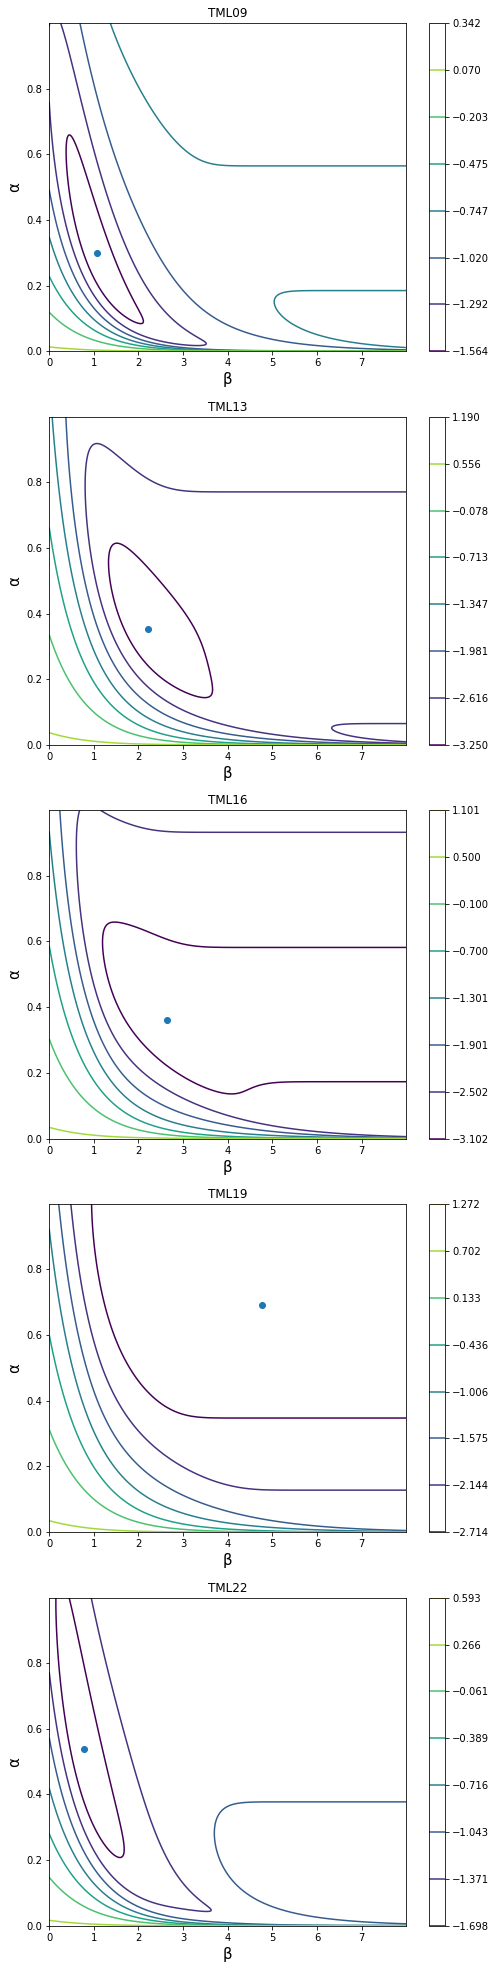

In [13]:
contour_plot(subject_num)

# <span style='background-color:yellow;'>Problem 3. </span>

## For single plot
### ex) input : 16

In [14]:
subject_num = int(input('\n\n Subject Number: '))    



 Subject Number: 16


In [15]:
def P3(subject_num):
    
    
    def f(x,a,b,g = 0.5):
        
        if(x < 0):
            return g*(np.exp(-a*(-x)**b))
        elif (x == 0):
            return g
        else:
            return 1-(1-g)*(np.exp(-a*(x**b)))

        
    def RSS(a,b,g = 0.5):
        Sum = 0
        
        for i in range(len(x_diff)):
            each = (f(x_diff[i], a,b)-y[i])**2
            Sum += each
        return Sum
    
    
    if subject_num < 10:
        df = pd.read_csv('./ChallengingProject//TML0{}_Dis.txt'.format(subject_num), sep='\t', header=None)
    else :
        df = pd.read_csv('./ChallengingProject//TML{}_Dis.txt'.format(subject_num), sep='\t', header=None)
    df.columns = ['Block','Trial','f1','First Time','f2','Second Time','Decision','Time to Decide','Third Time']
    
    
    high_prob = []

    for F in range(10, 21):
        
        if (F == 15):
            continue
    
        else:
            high_score = 0
            Dec_list = list(df[df['f1']==F]['Decision'])
            high_score += Dec_list.count('before')
            Dec_list = list(df[df['f2']==F]['Decision'])
            high_score += Dec_list.count('after')
    
            high_prob.append(high_score/10)
     
    
    x = [i for i in range(10,21) if i!=15 ]
    y = high_prob
    x_diff = np.array(x)-15
    
    
    alpha = np.arange(0,1,0.001)
    beta = np.arange(0,8,0.001)
    Alpha,Beta = np.meshgrid(alpha,beta)
    Z = np.log(RSS(Alpha,Beta))
    
    
    optimal_alpha = Alpha.reshape(Alpha.size,)[np.argmin(Z)]
    optimal_beta = Beta.reshape(Beta.size,)[np.argmin(Z)]
    
    
    plt.scatter(x,y)
    plt.scatter(15,0.5)
    plt.grid(True)
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('proportion \'higher\' responses')
    
    
    if subject_num < 10:
        plt.title('TML0{}'.format(subject_num))
    else:
        plt.title('TML{}'.format(subject_num))
    
    
    X = np.linspace(10,20, 100)
    X_diff = X - 15
    Y = []
    
    for s in X_diff:
        result = f(s, optimal_alpha, optimal_beta)
        Y.append(result)

        
    JND = (np.log(2)/optimal_alpha)**(1/optimal_beta)

    
    plt.plot(X, Y, label='α={}\nβ={}\nJND={}Hz'.format(round(optimal_alpha,3), round(optimal_beta,3), round(JND,3)))
    plt.legend(loc='upper left')
    

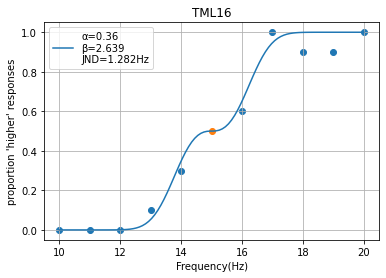

In [16]:
P3(subject_num)

## For multiple plots
### ex) input: 9,13,16,19,22

In [17]:
filenames = os.listdir('./ChallengingProject')
print(filenames)

subject_num = input('\n\n Subject Numbers (no spacing): ')

['TML04_Dis.txt', 'TML05_Dis.txt', 'TML06_Dis.txt', 'TML07_Dis.txt', 'TML09_Dis.txt', 'TML10_Dis.txt', 'TML11_Dis.txt', 'TML12_Dis.txt', 'TML13_Dis.txt', 'TML14_Dis.txt', 'TML15_Dis.txt', 'TML16_Dis.txt', 'TML18_Dis.txt', 'TML19_Dis.txt', 'TML20_Dis.txt', 'TML21_Dis.txt', 'TML22_Dis.txt', 'TML23_Dis.txt', 'TML24_Dis.txt', 'TML25_Dis.txt', 'TML26_Dis.txt', 'TML27_Dis.txt', 'TML28_Dis.txt', 'TML29_Dis.txt']


 Subject Numbers (no spacing): 9,13,16,19,22


In [18]:
def P3_multi(filename):
    
    
    def f(x,a,b,g = 0.5):
        if(x < 0):
            return g*(np.exp(-a*(-x)**b))
        elif (x == 0):
            return g
        else:
            return 1-(1-g)*(np.exp(-a*(x**b)))

    def RSS(a,b,g = 0.5):
        Sum = 0
        for i in range(len(x_diff)):
            each = (f(x_diff[i], a,b)-y[i])**2
            Sum += each
        return Sum

    
    subject_list = subject_num.split(',')
    
    cnt = 0
    fig, ax = plt.subplots(len(subject_list), 1, figsize=(8,7*len(subject_list)))
    
    
    for i in subject_list:
        
        if int(i) < 10:
            df = pd.read_csv('./ChallengingProject//TML0{}_Dis.txt'.format(i), sep='\t', header=None)
        else :
            df = pd.read_csv('./ChallengingProject//TML{}_Dis.txt'.format(i), sep='\t', header=None)
        df.columns = ['Block','Trial','f1','First Time','f2','Second Time','Decision','Time to Decide','Third Time']
    
    
        high_prob = []

        for F in range(10, 21):
        
            if (F == 15):
                continue
    
            else:
                high_score = 0
                Dec_list = list(df[df['f1']==F]['Decision'])
                high_score += Dec_list.count('before')
                Dec_list = list(df[df['f2']==F]['Decision'])
                high_score += Dec_list.count('after')
    
                high_prob.append(high_score/10)
        
        
        x = [i for i in range(10,21) if i!=15 ]
        y = high_prob
    
        
        x_diff = np.array(x)-15
    
    
        alpha = np.arange(0,1,0.001)
        beta = np.arange(0,8,0.001)
        Alpha,Beta = np.meshgrid(alpha,beta)
        Z = np.log(RSS(Alpha,Beta))
    
    
        optimal_alpha = Alpha.reshape(Alpha.size,)[np.argmin(Z)]
        optimal_beta = Beta.reshape(Beta.size,)[np.argmin(Z)]
    
    
        ax[cnt].scatter(x,y)
        ax[cnt].scatter(15,0.5)
        ax[cnt].grid(True)
        
        
        if int(i) < 10:
            ax[cnt].set_title('TML0{}'.format(i))
        else:
            ax[cnt].set_title('TML{}'.format(i))
            
            
        ax[cnt].set_xlabel('Frequency(Hz)')
        ax[cnt].set_ylabel('proportion \'higher\' responses')
    
    
        X = np.linspace(10,20, 100)
        X_diff = X - 15
        Y = []
    
        for s in X_diff:
            result = f(s, optimal_alpha, optimal_beta)
            Y.append(result)

            
        JND = (np.log(2)/optimal_alpha)**(1/optimal_beta)
    
    
        ax[cnt].plot(X, Y, label='α={}\nβ={}\nJND={}Hz'.format(round(optimal_alpha,3), round(optimal_beta,3), round(JND,3)))
        ax[cnt].legend(loc='upper left')
        
        cnt += 1

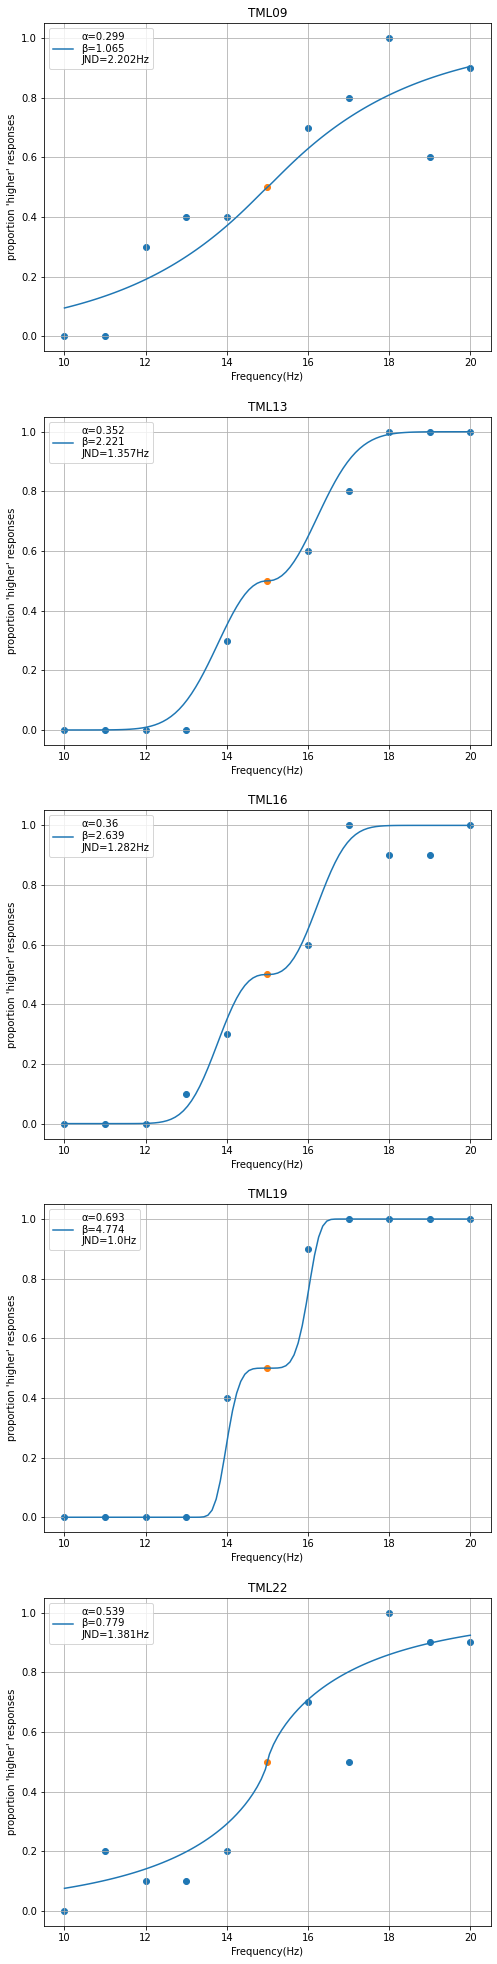

In [19]:
P3_multi(subject_num)